In [1]:
import numpy as np
# Στόχος: υπολογισμός τιμής πώλησης σπιτιού με βάση κάποια χαρακτηριστικά.
# Υποθέτουμε πως έχουμε δεδομένα για 10 σπίτια και γνωρίζουμε τα εξής στοιχεία για αυτά:
# Εμβαδόν:
area = np.array( [80, 45, 130, 93, 78, 29, 99, 110, 68, 55] )
# Ηλικία
age = np.array( [15, 2, 40, 8, 31, 25, 10, 23, 5, 32] )
# Τιμή (σε χιλ. ευρώ) σε τρέχουσες αναρτήσεις αγγελιών
price = np.array( [180, 170, 110, 210, 120, 40, 190, 170, 160, 120] )

Text(0, 0.5, 'Price')

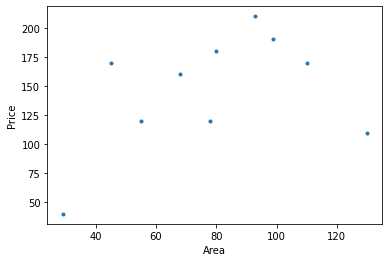

In [2]:
# Πόσο καλά προβλέπει το εμβαδόν την τιμή;
import matplotlib.pyplot as plt
plt.clf()
plt.plot(area, price, '.')
plt.xlabel('Area')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

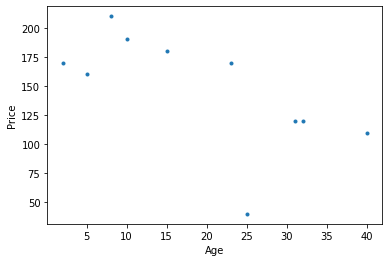

In [3]:
# Πόσο καλά προβλέπει η ηλικία την τιμή;
import matplotlib.pyplot as plt
plt.clf()
plt.plot(age, price, '.')
plt.xlabel('Age')
plt.ylabel('Price')

Η εξίσωση μιας γραμμής με μία μεταβλητή εισόδου (x) και μία μεταβλητή εξόδου (y), είναι η εξής:

$$ y = w*x + b $$

$w$: είναι η κλίση της ευθείας, δηλ, πόσο απότομα ανεβαίνει (αν είναι θετικό) ή κατεβαίνει (αν είναι αρνητικό)

$b$: είναι ο σταθερός όρος, δηλ, που τέμνει η ευθεία τον άξονα του $y$ όταν $x = 0$.

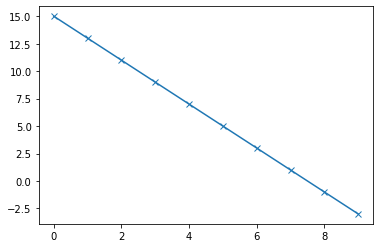

In [8]:
x = np.arange(10)
w = -2
b = 15
y = w*x + b

plt.plot(x,y,'x-')

In [4]:
# Ας περάσουμε μια γραμμή μέσα από τα δεδομένα.
# Αρχικοποιούμε ένα αντικείμενο γραμμικής παλινδρόμισης.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

w:  [0.66975247]
b:  94.29048060995524
predicted_price:  [161.26572761]


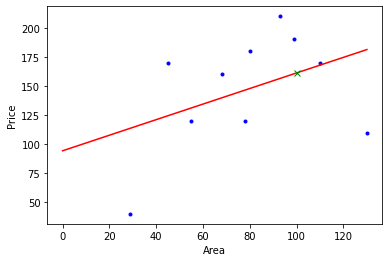

In [20]:
# Σχέση εμβαδόν-τιμή.
lin_reg.fit( area[:, None], price )

# Παίρνουμε τους συντελεστές που επιστρέφει:
w = lin_reg.coef_
b = lin_reg.intercept_
print('w: ', w)
print('b: ', b)

plt.clf()
plt.plot(area, price, 'b.')
plt.plot( [0, np.max(area)] , [b, w[0]*np.max(area) + b], 'r-' )
plt.xlabel('Area')
plt.ylabel('Price')

# Θέλουμε να δώσουμε ένα καινούργιο εμβαδό και να μας προβλέψει την τιμή του.
new_area = np.array([100])
predicted_price = lin_reg.predict( new_area[:,None] )
print('predicted_price: ', predicted_price)
plt.plot( new_area, predicted_price, 'xg' )

w:  [-2.50977533]
b:  194.9367088607595
predicted_price:  [104.58479687]


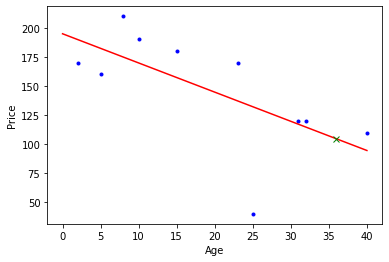

In [24]:
# Σχέση ηλικία-τιμή.
lin_reg.fit( age[:, None], price )

# Παίρνουμε τους συντελεστές που επιστρέφει:
w = lin_reg.coef_
b = lin_reg.intercept_
print('w: ', w)
print('b: ', b)

plt.clf()
plt.plot(age, price, 'b.')
plt.plot( [0, np.max(age)] , [b, w[0]*np.max(age) + b], 'r-' )
plt.xlabel('Age')
plt.ylabel('Price')

# Θέλουμε να δώσουμε μια καινούργια ηλικία και να μας προβλέψει την τιμή του.
new_age = np.array([36])
predicted_price = lin_reg.predict( new_age[:,None] )
print('predicted_price: ', predicted_price)
plt.plot( new_age, predicted_price, 'xg' )

In [26]:
import pandas as pd

df = pd.DataFrame(data = np.c_[ area, age, price ], 
                  index = np.arange( len(price) ), 
                  columns = ['area', 'age', 'price'])

df.head()

,area,age,price
0,80,15,180
1,45,2,170
2,130,40,110
3,93,8,210
4,78,31,120


In [27]:
# Πως επηρεάζουν ταυτόχρονα το εμβαδόν και η ηλικία την τιμή;
import plotly.express as px
fig = px.scatter_3d(df, x='area', y='age', z='price')
fig.show()

In [28]:
# Σχέση (εμβαδόν x ηλικία)-τιμή.
lin_reg.fit( np.c_[ area, age ], price )

# Παίρνουμε τους συντελεστές που επιστρέφει:
w = lin_reg.coef_
b = lin_reg.intercept_
print('w: ', w)
print('b: ', b)

xx = np.linspace(np.min(area), np.max(area), 100)
yy = np.linspace(np.min(age), np.max(age), 100)
x,y = np.meshgrid(xx, yy)
z = w[0]*x + w[1]*y + b

# Ας προβλέψουμε ένα νέο σημείο με τα παρακάτω χαρακτηριστικά
new_area = 107
new_age = 22
new_price = lin_reg.predict( [[new_area, new_age]] )
print('new_price: ', new_price)

import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter_3d(df, x='area', y='age', z='price')
fig.add_traces(go.Surface(x=x, y=y, z=z, name='reg. plane',colorscale='Viridis'))
fig.add_scatter3d( x=[new_area], y=[new_age], z=new_price , marker=dict(color='red') )
fig.show()

w:  [ 1.02902312 -3.16808007]
b:  126.52620986271475
new_price:  [166.93392207]


is_expensive:  [ True  True False  True False False  True  True  True False]
price:  [180 170 110 210 120  40 190 170 160 120]
w:  [-0.0341971]
b:  1.2531645569620258
predicted_price:  [0.46663132]
predicted_class:  [False]


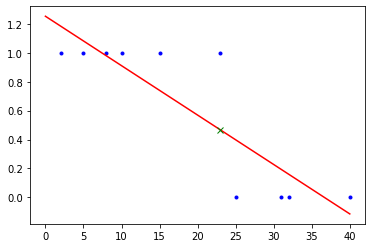

In [44]:
# Κατηγοριοποίηση σε ακριβά, αν η τιμή είναι πάνω από 150
is_expensive = price > 150
print('is_expensive: ', is_expensive)
print('price: ', price)

# Με ίδιο τρόπο, κάνουμε γραμμική παλινδρόμηση
lin_reg.fit( age[:, None], is_expensive )

w = lin_reg.coef_
b = lin_reg.intercept_

print('w: ', w)
print('b: ', b)

plt.clf()
plt.plot(age, is_expensive, 'b.')
plt.plot( [0, np.max(age)] , [b, w[0]*np.max(age) + b], 'r-' )

new_age = np.array([23])
predicted_price = lin_reg.predict( new_age[:,None] )
print('predicted_price: ', predicted_price)
plt.plot( new_age, predicted_price, 'xg' )
predicted_class = predicted_price > 0.5
print('predicted_class: ', predicted_class)

Η λογιστική απεικόνιση, ή σιγμοειδής συνάρτηση, εκφράζεται ως εξής:

$$ y = \frac{1}{1+e^{-(w*x+b)}} $$

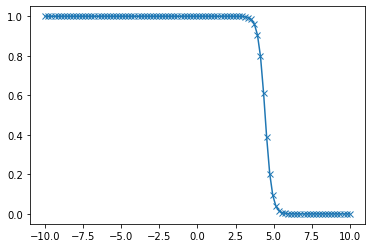

In [52]:
x = np.linspace(-10, 10, 100)

w = -4.5
b = 20

y = 1/( 1 + np.exp( -( w*x + b ) ) )

plt.plot(x , y, 'x-')

w:  [[-0.72909611]]
b:  [17.48159404]


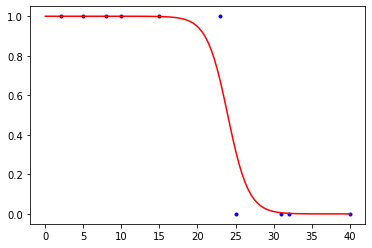

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(age[:, None], is_expensive)

w = log_reg.coef_
b = log_reg.intercept_

print('w: ', w)
print('b: ', b)

plt.clf()
plt.plot(age, is_expensive, 'b.')
x = np.linspace(0, np.max(age), 100)
plt.plot( x , 1/(1+np.exp(-w[0][0]*x-b[0])), 'r-' )

In [56]:
# Σχέση (εμβαδόν x ηλικία)-τιμή.
log_reg.fit( np.c_[ area, age ], is_expensive )

# Παίρνουμε τους συντελεστές που επιστρέφει:
w = log_reg.coef_
b = log_reg.intercept_
print('w: ', w)
print('b: ', b)

xx = np.linspace(np.min(area), np.max(area), 100)
yy = np.linspace(np.min(age), np.max(age), 100)
x,y = np.meshgrid(xx, yy)
z = 1/(1+ np.exp(- w[0][0]*x - w[0][1]*y - b[0] ))

# Ας προβλέψουμε ένα νέο σημείο με τα παρακάτω χαρακτηριστικά
new_area = 107
new_age = 22
new_price = log_reg.predict( [[new_area, new_age]] )
print('new_price: ', new_price)

import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter_3d(x=area, y=age, z=is_expensive.astype(int))
fig.add_traces(go.Surface(x=x, y=y, z=z, name='reg. plane',colorscale='Viridis'))
fig.add_scatter3d( x=[new_area], y=[new_age], z=new_price , marker=dict(color='red') )
fig.show()

w:  [[ 0.10104695 -0.55021703]]
b:  [4.99346056]
new_price:  [ True]
